In [44]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#get the data from google classroom
data = pd.read_csv("insurance_dataset.csv")

In [46]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [47]:
data.shape

(1000000, 12)

In [48]:
data.isna().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [49]:
data['medical_history'].value_counts()

medical_history
Heart disease          250121
High blood pressure    249782
Diabetes               249335
Name: count, dtype: int64

In [50]:
data['family_medical_history'].value_counts()

family_medical_history
Heart disease          250035
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64

In [51]:
data['medical_history'] = data['medical_history'].fillna('Unknown')
data['family_medical_history'] = data['family_medical_history'].fillna('Unknown')

In [52]:
data['medical_history'].value_counts()

medical_history
Unknown                250762
Heart disease          250121
High blood pressure    249782
Diabetes               249335
Name: count, dtype: int64

In [53]:
data['family_medical_history'].value_counts()

family_medical_history
Unknown                250404
Heart disease          250035
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64

In [54]:
import seaborn as sns
data.dtypes
num_col = data.select_dtypes(include=['int64', 'float64'])
cat_col = data.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['age', 'bmi', 'children', 'charges'], dtype='object'),
 Index(['gender', 'smoker', 'region', 'medical_history',
        'family_medical_history', 'exercise_frequency', 'occupation',
        'coverage_level'],
       dtype='object'))

In [55]:
# for col in cat_col.columns:
#     plt.figure() 
#     unique_values = data[col].nunique()  
#     sns.barplot(x=data[col], y=data['charges'], palette=sns.color_palette("husl", unique_values))  
#     plt.title(f'Bar plot of {col} vs. charges') 
#     # plt.savefig(f'./attachments/{col}_vs_charges.png')
#     plt.show()  


In [56]:
# for col in cat_col.columns:
#     plt.figure()  # Create a new figure for each plot
#     sns.barplot(x=data[col], y=data['charges'])
#     plt.title(f'Bar plot of {col} vs. charges')  # Optional: Add a title
#     # plt.savefig(f'{col}_vs_charges.png')  # Save the plot as an image file
#     plt.show()  # Display the plot

In [57]:
# for col in cat_col.columns:
    # sns.barplot(x = data[col], y = data['charges'])
    # plt.show()

In [58]:
# for col in num_col.columns:
#     sns.scatterplot(x = df['income'], y = df['life-exp'], hue=df['status'])
#     plt.show()

In [59]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,Unknown,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,Unknown,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,Unknown,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [60]:
# for i in num_col:
#     sns.kdeplot(data[i], fill=True, label=i)
#     # Set labels and title
#     # plt.xlabel('Age')
#     plt.ylabel('Density')
#     plt.title('KDE Plot')
#     plt.legend()
#     # plt.savefig(f'./attachments/{i}vscharges.png')
#     # Display the KDE plot
#     plt.show()

In [61]:
data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [62]:
data2 = data.copy()
data2 = data2.drop(['gender','region','exercise_frequency','occupation'], axis=1)
data2.head()

,age,bmi,children,smoker,medical_history,family_medical_history,coverage_level,charges
0,46,21.45,5,yes,Diabetes,Unknown,Premium,20460.307669
1,25,25.38,2,yes,Diabetes,High blood pressure,Premium,20390.899218
2,38,44.88,2,yes,Unknown,High blood pressure,Premium,20204.476302
3,25,19.89,0,no,Unknown,Diabetes,Standard,11789.029843
4,49,38.21,3,yes,Diabetes,High blood pressure,Standard,19268.309838


In [63]:
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'medical_history',
       'family_medical_history', 'coverage_level', 'charges'],
      dtype='object')

In [64]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
data2['smoker']= label_encoder.fit_transform(data2['smoker']) 
data2['medical_history']= label_encoder.fit_transform(data2['medical_history']) 
data2['family_medical_history']= label_encoder.fit_transform(data2['family_medical_history']) 
data2['coverage_level']= label_encoder.fit_transform(data2['coverage_level']) #ordinal

In [65]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   bmi                     1000000 non-null  float64
 2   children                1000000 non-null  int64  
 3   smoker                  1000000 non-null  int64  
 4   medical_history         1000000 non-null  int64  
 5   family_medical_history  1000000 non-null  int64  
 6   coverage_level          1000000 non-null  int64  
 7   charges                 1000000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 61.0 MB


In [66]:
data2.isna().sum()

age                       0
bmi                       0
children                  0
smoker                    0
medical_history           0
family_medical_history    0
coverage_level            0
charges                   0
dtype: int64

In [67]:
# One-hot encoding for the specified columns
medical_history_encoded = pd.get_dummies(data2['medical_history'], prefix='medical_history')
family_history_encoded = pd.get_dummies(data2['family_medical_history'], prefix='family_history')

# Concatenate the original DataFrame with the new one-hot encoded columns
data2 = pd.concat([data2, medical_history_encoded, family_history_encoded], axis=1)

# Drop the original columns if you don't need them anymore
data2.drop(['medical_history', 'family_medical_history'], axis=1, inplace=True)

In [68]:
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'coverage_level', 'charges',
       'medical_history_0', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'family_history_0', 'family_history_1',
       'family_history_2', 'family_history_3'],
      dtype='object')

In [72]:
data2.rename(columns={'medical_history_0': 'medical_history_Diabetes', 
'medical_history_1': 'medical_history_Heart',
'medical_history_2': 'medical_history_HighBp',
'medical_history_3': 'medical_history_unknown',
'family_history_0': 'fam_medical_history_Diabetes', 
'family_history_1': 'fam_medical_history_Heart',
'family_history_2': 'fam_medical_history_HighBp',
'family_history_3': 'fam_medical_history_unknown'}, inplace=True)

In [73]:
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'coverage_level', 'charges',
       'medical_history_Diabetes', 'medical_history_Heart',
       'medical_history_HighBp', 'medical_history_unknown',
       'fam_medical_history_Diabetes', 'fam_medical_history_Heart',
       'fam_medical_history_HighBp', 'fam_medical_history_unknown'],
      dtype='object')

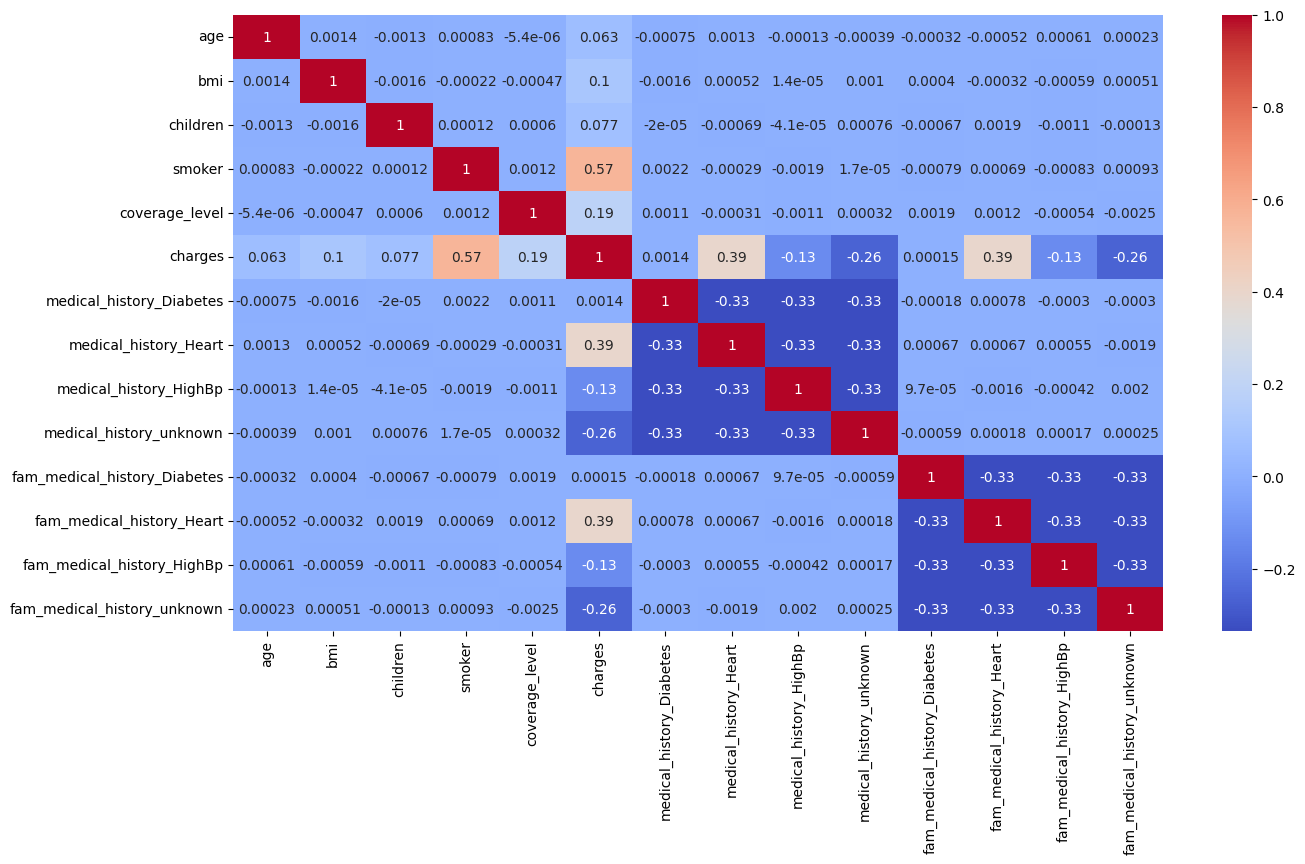

In [75]:
plt.figure(figsize = (15,8))
sns.heatmap(data2.corr(), annot=True, cmap="coolwarm")
plt.savefig(f'./attachments/corr_v2.png')  # Save the plot as an image file